## Описание проекта
Вы работаете в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи вашего мобильного приложения.

Изучите воронку продаж. Узнайте, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?

После этого исследуйте результаты `A/A/B`-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам `A/A/B`-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выясните, какой шрифт лучше.

Создание двух групп `A` вместо одной имеет определённые преимущества. Если две контрольные группы окажутся равны, вы можете быть уверены в точности проведенного тестирования. Если же между значениями `A` и `A` будут существенные различия, это поможет обнаружить факторы, которые привели к искажению результатов. Сравнение контрольных групп также помогает понять, сколько времени и данных потребуется для дальнейших тестов.

В случае общей аналитики и `A/A/B`-эксперимента работайте с одними и теми же данными. В реальных проектах всегда идут эксперименты. Аналитики исследуют качество работы приложения по общим данным, не учитывая принадлежность пользователей к экспериментам.

## Описание данных
Каждая запись в логе — это действие пользователя, или событие:
* `EventName` — название события;
* `DeviceIDHash` — уникальный идентификатор пользователя;
* `EventTimestamp` — время события;
* `ExpId` — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

## Инструкция по выполнению проекта
### **Шаг 1**. Откройте файл с данными и изучите общую информацию
Путь к файлу: /datasets/logs_exp.csv. Скачать датасет
### **Шаг 2**. Подготовьте данные
* Замените названия столбцов на удобные для вас;
* Проверьте пропуски и типы данных. Откорректируйте, если нужно;
* Добавьте столбец даты и времени, а также отдельный столбец дат;

### **Шаг 3**. Изучите и проверьте данные
* Сколько всего событий в логе?
* Сколько всего пользователей в логе?
* Сколько в среднем событий приходится на пользователя?
* Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Постройте гистограмму по дате и времени. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?
* Много ли событий и пользователей вы потеряли, отбросив старые данные?
* Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.

### **Шаг 4**. Изучите воронку событий
* Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.
* Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие.
* Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.
* По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.
* На каком шаге теряете больше всего пользователей?
* Какая доля пользователей доходит от первого события до оплаты?

### **Шаг 5**. Изучите результаты эксперимента
* Сколько пользователей в каждой экспериментальной группе?
* Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.
* Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?
* Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?
* Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.

## **Шаг 1, 2**: Анализ и предобработка данных

In [1]:
# импорт библиотк
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
from scipy import stats as st
import datetime as dt
from plotly import graph_objects as go

import warnings
warnings.filterwarnings('ignore')

####################################
import plotly.io as pio
png_renderer = pio.renderers["png"]
png_renderer.width = 1000
png_renderer.height = 1000
pio.renderers.default = "png"


In [2]:
pd.set_option('display.max_rows', 200)
logs = pd.read_csv("https://code.s3.yandex.net/datasets/logs_exp.csv", sep='\t')
# 1. выводи инфо о данных
# 2. проверка дубликатов и условное удаление дубликатов из данных
# 3. проверка пропусков в данных
# 4. отработка приведения колонок в данных к стилю "snake_style" и проверка в данном проекте не проводиттся, будет замена
#    названий столбцов

In [3]:
dfs_dict = {'logs':logs}
for name_, df_ in dfs_dict.items():
    print('\033[1m'+f'INFO {name_}'+'\033[0m', end='\n\n')
    print(df_.info(), end='\n\n')
    print('\033[1m'+f'Initial Duplicates in {name_}: '+'\033[0m', df_.duplicated().sum(), end='\n\n')
    if df_.duplicated().sum() > 0:
        df_.drop_duplicates(inplace=True)
        print('\033[1m'+f'Final Duplicates  in {name_}: '+'\033[0m', df_.duplicated().sum(), end='\n\n')
    print('\033[1m'+f'Number of NULLs in {name_}:'+'\033[0m\n', df_.isna().sum(), end='\n\n')
#     df_.columns = df_.columns.str.lower().str.replace(' ', '_')
#     print('\033[1m'+f'Columns in {name_}:'+'\033[0m\n', df_.columns)
#     display(df_.head(3))
    print('='*60)

INFO logs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
None

Initial Duplicates in logs:  413

Final Duplicates  in logs:  0

Number of NULLs in logs:
 EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64



In [4]:
logs.columns=['event', 'user', 'timestamp', 'group']   
logs.head()

,event,user,timestamp,group
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [5]:
logs['datetime'] = pd.to_datetime(logs.timestamp, unit='s')
logs['date'] = logs.datetime.dt.date
logs.head()

,event,user,timestamp,group,datetime,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


### **Вывод**
* Данные представлены в одном файле
* Пропуски отсуствуют
* Дубликаты удалены в кол-ве 413
* Названия колонок заменены на более простые и в соответствии с требованиями ***snake_style***
* Данные о событии преставлены строковым типом, данные об id пользователя, дата и время, группа представлены целочисленным типом

## **Шаг 3**: Изучение и проверка данных

### Кол-во событий, польлзователей, среднее число событий на пользователя

In [6]:
print(f'Типы событий: , {logs.event.unique()}')
print(f'Кол-во событий: , {logs.event.count()}')

Типы событий: , ['MainScreenAppear' 'PaymentScreenSuccessful' 'CartScreenAppear'
 'OffersScreenAppear' 'Tutorial']
Кол-во событий: , 243713


In [7]:
event_groups = logs.groupby('event', as_index=False).user.count()
event_groups.columns = ['event', 'count']
event_groups.sort_values('count', ascending=False)

,event,count
1,MainScreenAppear,119101
2,OffersScreenAppear,46808
0,CartScreenAppear,42668
3,PaymentScreenSuccessful,34118
4,Tutorial,1018


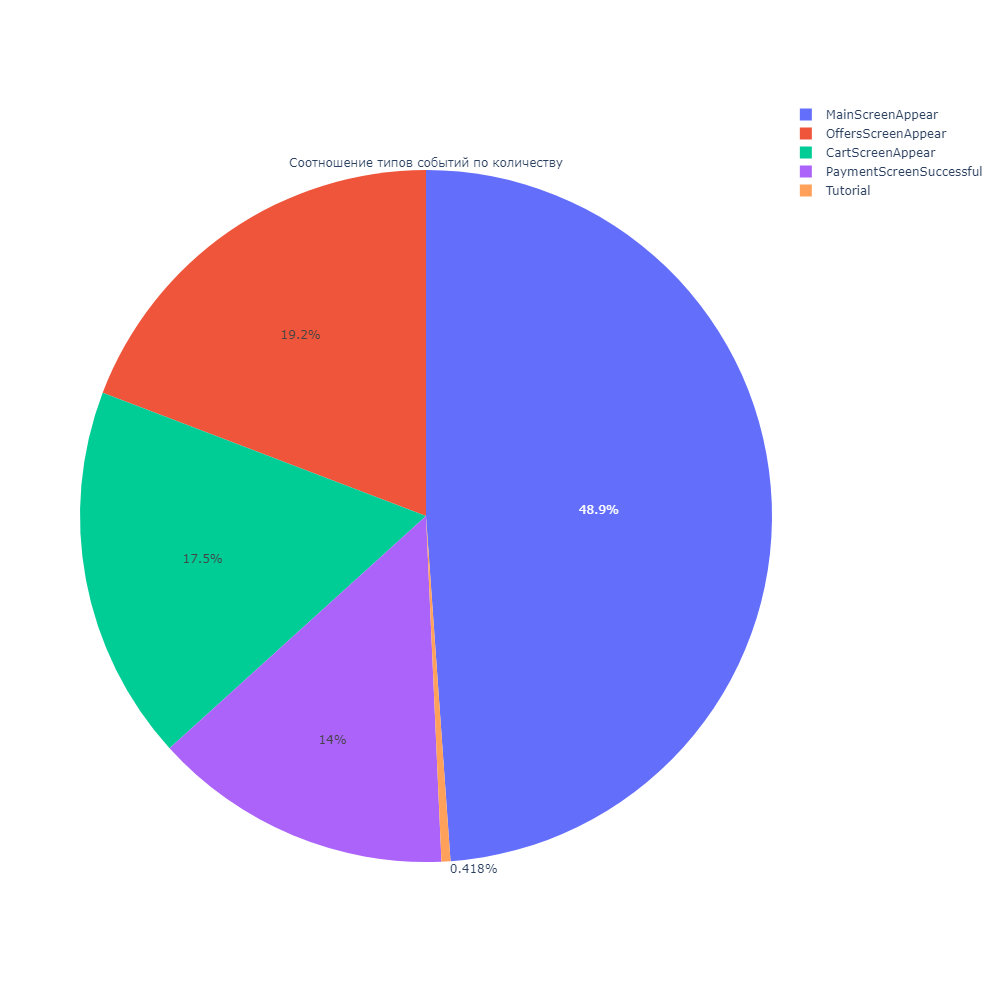

In [8]:
fig = go.Figure(data=[go.Pie(labels=event_groups.event, values=event_groups['count'], \
                           title='Соотношение типов событий по количеству' )])
fig.show()

In [9]:
print('Кол-во пользователей в логе: ', logs.user.nunique())

Кол-во пользователей в логе:  7551


In [10]:
user_events = logs.groupby('user', as_index=False).event.count()
user_events.columns = ['user', 'event_sum']
user_events.event_sum.describe()  # описание кол-ва событий на пользователя

count    7551.000000
mean       32.275593
std        65.154219
min         1.000000
25%         9.000000
50%        20.000000
75%        37.000000
max      2307.000000
Name: event_sum, dtype: float64

In [11]:
user_events.sort_values('event_sum', ascending=False).head(10)

,user,event_sum
5116,6304868067479728361,2307
147,197027893265565660,1998
3714,4623191541214045580,1768
5590,6932517045703054087,1439
1391,1754140665440434215,1221
2641,3337471580007169353,1186
6294,7738058666231999878,888
822,1055544042902443290,854
3801,4713748699910253089,824
6617,8118046800480174342,755


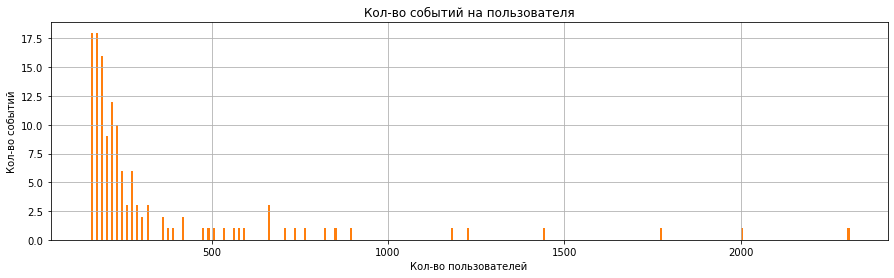

In [12]:
plt.figure(figsize=(15,4))
plt.hist(user_events, bins=150, range=(150,2310)) 
plt.xlabel('Кол-во пользователей')
plt.grid()
plt.ylabel('Кол-во событий')
plt.title('Кол-во событий на пользователя');

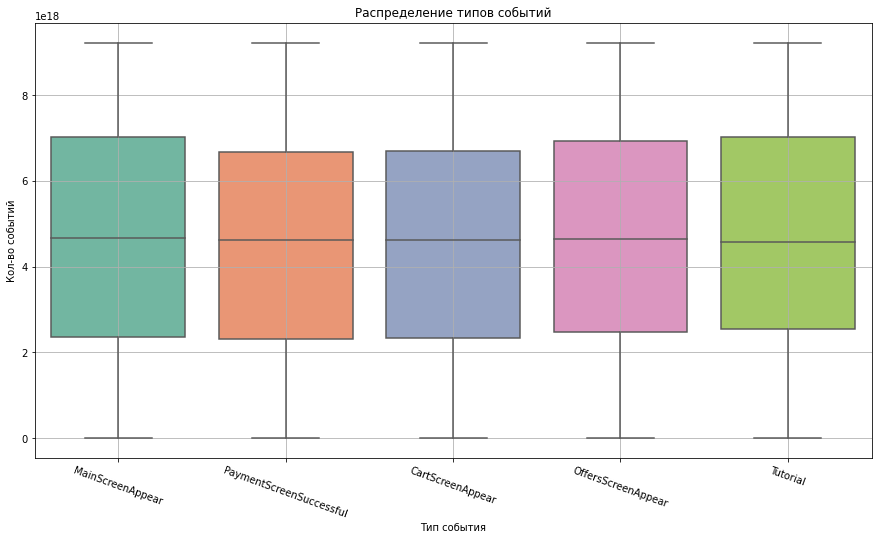

In [13]:
plt.figure(figsize=(15,8))
# plt.ylim(0,400)
plt.title('Распределение типов событий')
sns.boxplot(x="event", y="user", data=logs, palette='Set2')
plt.grid()
plt.xlabel('Тип события')
plt.ylabel('Кол-во событий')
plt.xticks(rotation=-20)
plt.show();

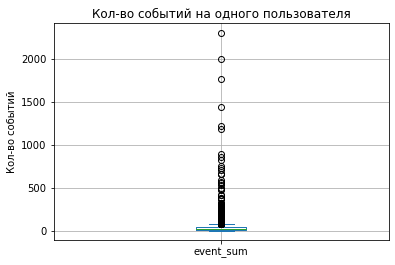

In [14]:
user_events.event_sum.plot.box(figsize=(6, 4), grid=True)
plt.ylabel("Кол-во событий")
plt.title("Кол-во событий на одного пользователя")
plt.show()

Имеются выбросы, однако необходимо определеить период, за который имеются достаточные данные

### **Вывод**:
* Кол-во событий в логе - 243713
* Кол-во пользователей в логе - 7551
* Среднее кол-во событий на пользователя - 32,28, медиана - 20

### Определение временного отрезка с полными динными

In [15]:
print(f"Начальная дата: {logs['datetime'].min()}")
print(f"Конечная дата: {logs['datetime'].max()}")
print(f"Продолжительность периода представленных данных: {logs['datetime'].max() - logs['datetime'].min()}")

Начальная дата: 2019-07-25 04:43:36
Конечная дата: 2019-08-07 21:15:17
Продолжительность периода представленных данных: 13 days 16:31:41


In [16]:
date_event_sum = logs.groupby('date',as_index=False).user.count()
date_event_sum.columns = ['date', 'event_sum']
date_event_sum

,date,event_sum
0,2019-07-25,9
1,2019-07-26,31
2,2019-07-27,55
3,2019-07-28,105
4,2019-07-29,184
5,2019-07-30,412
6,2019-07-31,2030
7,2019-08-01,36141
8,2019-08-02,35554
9,2019-08-03,33282


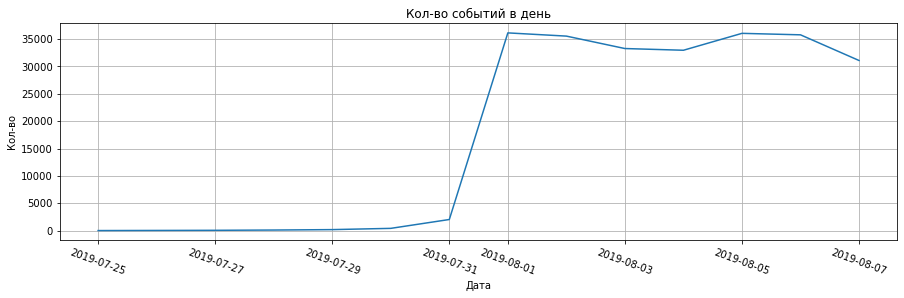

In [17]:
plt.rcParams["figure.figsize"] = (15, 4)
sns.lineplot(date_event_sum.date, date_event_sum.event_sum)
# plt.xticks(date_event_sum.date)
plt.xticks(rotation=-20) 
plt.xlabel('Дата')
plt.ylabel('Кол-во')
plt.title('Кол-во событий в день')
plt.grid()
plt.show()

In [18]:
logs['dt_h'] = logs['datetime'].dt.floor('h') # dt_h - datetime hours
logs.head()

,event,user,timestamp,group,datetime,date,dt_h
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25,2019-07-25 04:00:00
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25,2019-07-25 11:00:00
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25,2019-07-25 11:00:00
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25,2019-07-25 11:00:00
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25,2019-07-25 11:00:00


In [19]:
date_event_sum = logs.groupby('dt_h',as_index=False).user.count()
date_event_sum.columns = ['date', 'event_sum']
date_event_sum

,date,event_sum
0,2019-07-25 04:00:00,1
1,2019-07-25 11:00:00,5
2,2019-07-25 14:00:00,1
3,2019-07-25 20:00:00,2
4,2019-07-26 03:00:00,1
...,...,...
279,2019-08-07 17:00:00,1906
280,2019-08-07 18:00:00,1679
281,2019-08-07 19:00:00,1507
282,2019-08-07 20:00:00,949


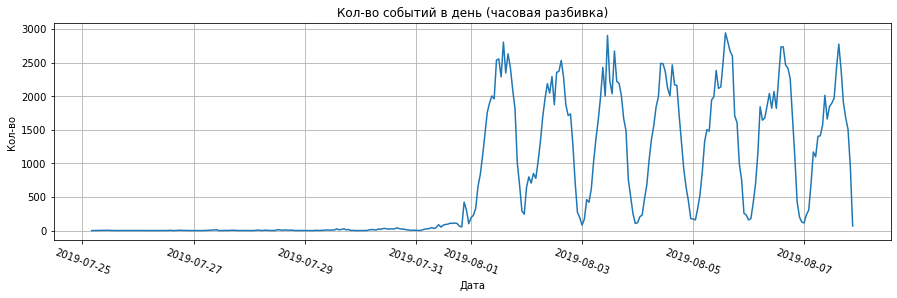

In [20]:
plt.rcParams["figure.figsize"] = (15, 4)
sns.lineplot(date_event_sum.date, date_event_sum.event_sum)
plt.xticks(rotation=-20) 
plt.xlabel('Дата')
plt.ylabel('Кол-во')
plt.title('Кол-во событий в день (часовая разбивка)')
plt.grid()
plt.show()

Обратим внимание на следующую область

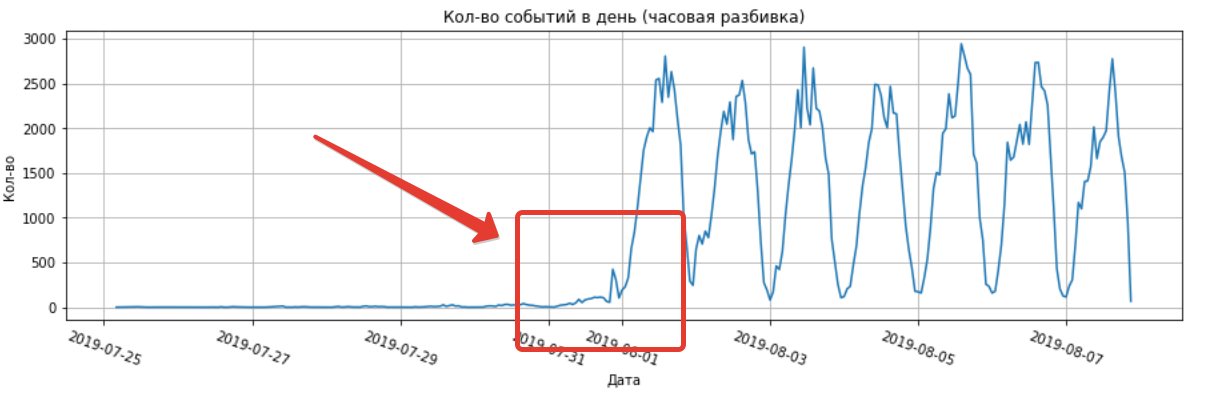

In [21]:
des_magnified = date_event_sum.query('date > "2019-07-31 16:00:00" & date < "2019-08-01 12:00:00"')
des_magnified

,date,event_sum
111,2019-07-31 17:00:00,113
112,2019-07-31 18:00:00,106
113,2019-07-31 19:00:00,65
114,2019-07-31 20:00:00,56
115,2019-07-31 21:00:00,424
116,2019-07-31 22:00:00,309
117,2019-07-31 23:00:00,104
118,2019-08-01 00:00:00,192
119,2019-08-01 01:00:00,228
120,2019-08-01 02:00:00,328


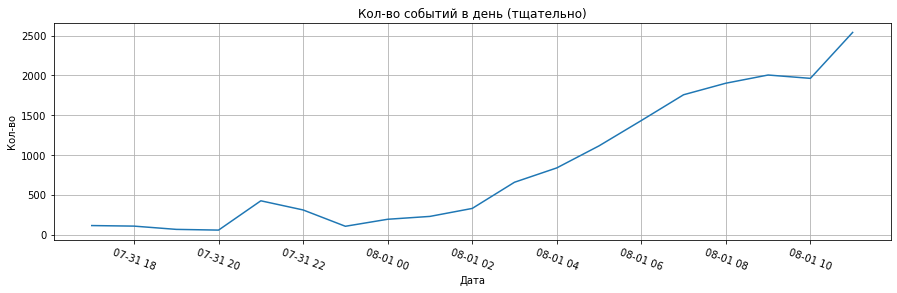

In [22]:
plt.rcParams["figure.figsize"] = (15, 4)
sns.lineplot(des_magnified.date, des_magnified.event_sum)
plt.xticks(rotation=-20) 
plt.xlabel('Дата')
plt.ylabel('Кол-во')
plt.title('Кол-во событий в день (тщательно)')
plt.grid()
plt.show()

Виден всплеск 2019/07/31 21:00. Будем рассматривать данные начиная с этой временной точки и до предоставленной конечной даты

In [23]:
data = logs.query('dt_h > "2019-07-31 21:00:00"')  # фрейм для дальнейшего анализа
print('Кол-во отфильтрованных записей событий:', logs.event.count() - data.event.count())
print('Доля отфильтрованных записей событий:', round((logs.event.count() - data.event.count()) / logs.event.count() *100,2), '%')
print('Кол-во отфильтрованных пользователей:', logs.user.nunique() - data.user.nunique())
print('Доля отфильтрованных пользователей:', round((logs.user.nunique() - data.user.nunique()) / logs.user.nunique() *100,2), '%')

Кол-во отфильтрованных записей событий: 2413
Доля отфильтрованных записей событий: 0.99 %
Кол-во отфильтрованных пользователей: 13
Доля отфильтрованных пользователей: 0.17 %


In [24]:
data.group.unique()    # проверка номеров групп

array([246, 248, 247], dtype=int64)

In [25]:
groups_list = [246, 247, 248]
for i in groups_list:
    print('Кол-во пользователей в группе №', i, 'составляет ', data.query('group == @i').user.nunique())

Кол-во пользователей в группе № 246 составляет  2484
Кол-во пользователей в группе № 247 составляет  2517
Кол-во пользователей в группе № 248 составляет  2537


Заменим название групп на а1, а2 и b, проверим их пересечение

In [26]:
groups_dict = {246:'a1', 247:'a2', 248:'b'}
for old_name, new_name in groups_dict.items():
    data.loc[data['group'] == old_name, 'group'] = new_name
data.group.unique()

array(['a1', 'b', 'a2'], dtype=object)

In [27]:
for i in (data.group.unique()):
    for j in (data.group.unique()):
        if i <= j: continue
        print('Пересечение групп' , i, 'и', f'{j}:', len(np.intersect1d(data.query('group == @i').user, \
                                                                       data.query('group == @j').user))) 

Пересечение групп b и a1: 0
Пересечение групп b и a2: 0
Пересечение групп a2 и a1: 0


### **Вывод**
* Временной отрезок с полными данными: 2019/07/31 21:00 - 2019-08-07 21:15:17


* Кол-во отфильтрованных записей событий: 2413
* Доля отфильтрованных записей событий: 0.99 %
* Кол-во отфильтрованных пользователей: 13
* Доля отфильтрованных пользователей: 0.17 %


* Кол-во пользователей в группе № 246 составляет  2484
* Кол-во пользователей в группе № 247 составляет  2517
* Кол-во пользователей в группе № 248 составляет  2537
* Группы пользователей не пересекаются

## **Шаг 4**: Воронка событий

In [28]:
event_list = data.event.unique()  # события

In [29]:
events = data.groupby('event', as_index=False).user.nunique().sort_values('user', ascending=False)
events.columns = ['event', 'event_sum']
events['events_share'] = events.event_sum / events.event_sum.sum()
events.events_share = events.events_share.map(lambda x: '{:.2%}'.format(x))
events   # события и их доля

,event,event_sum,events_share
1,MainScreenAppear,7423,36.87%
2,OffersScreenAppear,4595,22.82%
0,CartScreenAppear,3735,18.55%
3,PaymentScreenSuccessful,3539,17.58%
4,Tutorial,841,4.18%


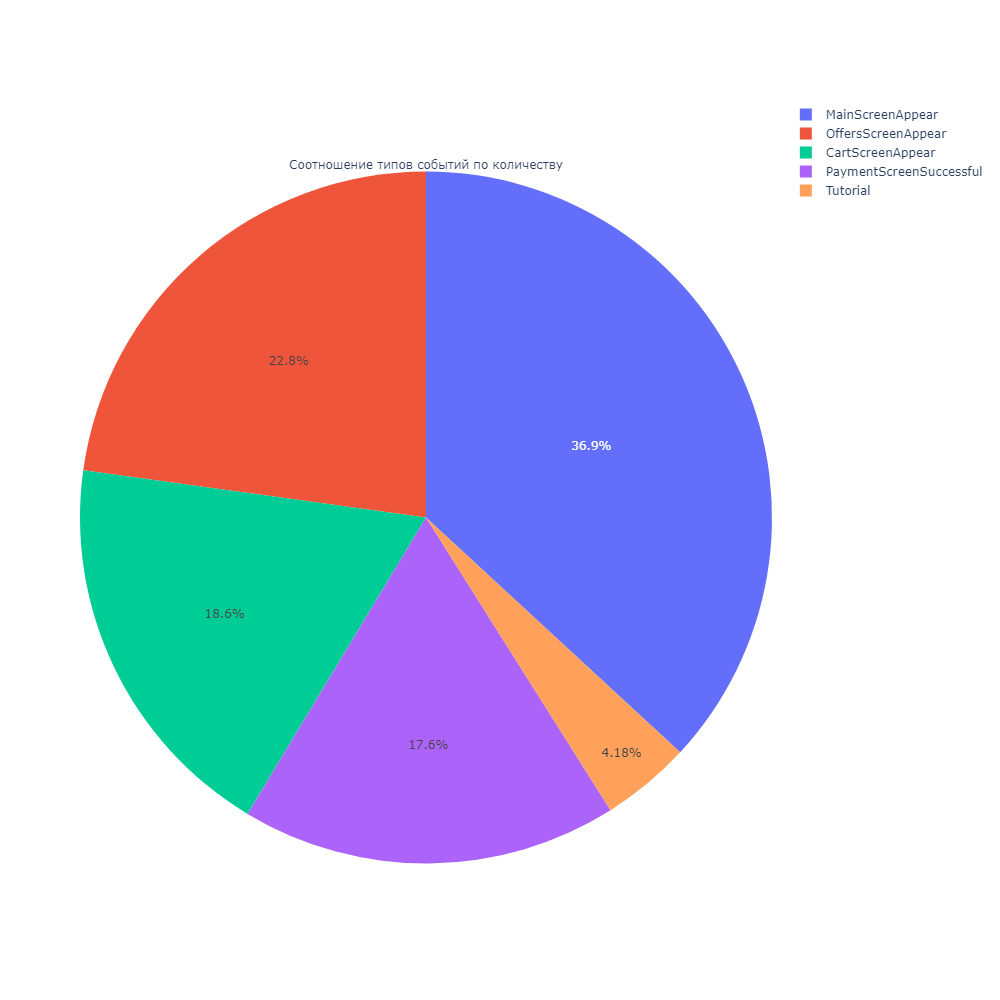

In [30]:
fig = go.Figure(data=[go.Pie(labels=events.event, values=events.event_sum, \
                           title='Соотношение типов событий по количеству' )])
fig.show()

In [31]:
event_users = data.groupby('event', as_index=False).user.nunique().sort_values('user', ascending=False)
event_users['use_level'] = event_users.user / data.user.nunique()
event_users['use_level_%'] = event_users.use_level.map(lambda x: '{:.2%}'.format(x))
event_users   # уникальные пользователи в каждом типе событий

,event,user,use_level,use_level_%
1,MainScreenAppear,7423,0.984744,98.47%
2,OffersScreenAppear,4595,0.609578,60.96%
0,CartScreenAppear,3735,0.495490,49.55%
3,PaymentScreenSuccessful,3539,0.469488,46.95%
4,Tutorial,841,0.111568,11.16%


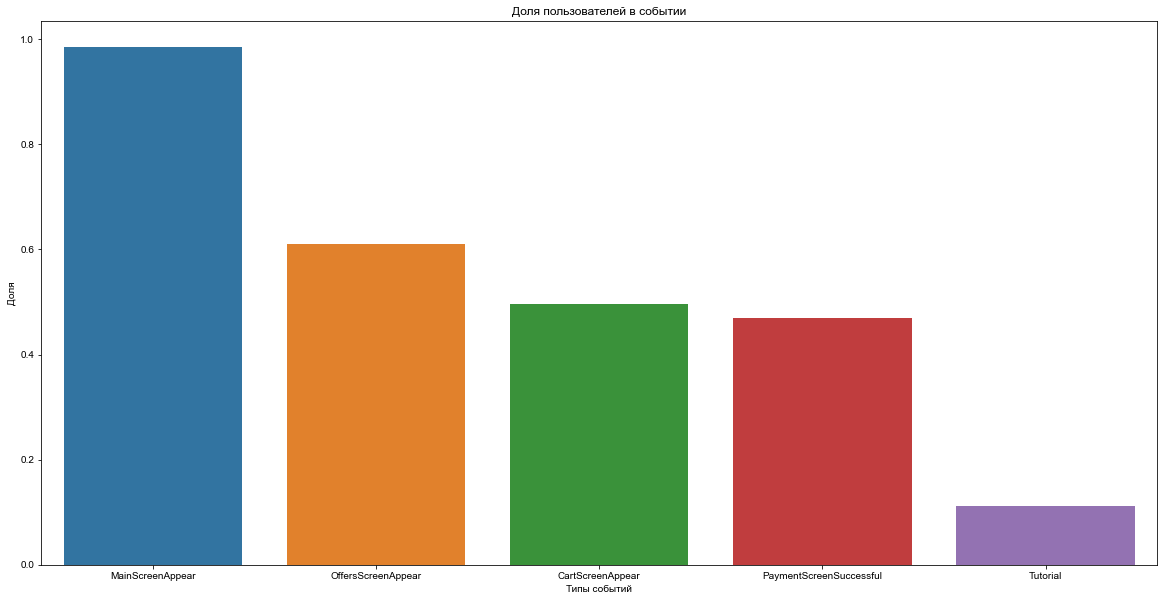

In [32]:
fig, ax = plt.subplots()
ax = sns.barplot(x='event', y='use_level',   data=event_users)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Доля пользователей в событии')
ax.set_xlabel('Типы событий')
ax.set_ylabel('Доля') 
# ax.legend(chains.object_type)
sns.set_style("dark")
fig.set_figheight(10)  # высота
fig.set_figwidth(20)  # ширина

Последовательность необходимых событий представляется следующим образом:
1. Главный экран (*MainScreenAppear*)
2. Экран предложения о покупке (*OfferScreenAppear*)
3. Экран оплаты (*CartScreenAppear*)
4. Экран подтверждения успешной оплаты (*PaymentScreenSuccessful*)

Образовательный раздел (*Tutorial*) не участвует в процессе покупки непосредственно и является вспомогательным



Общая воронка событий


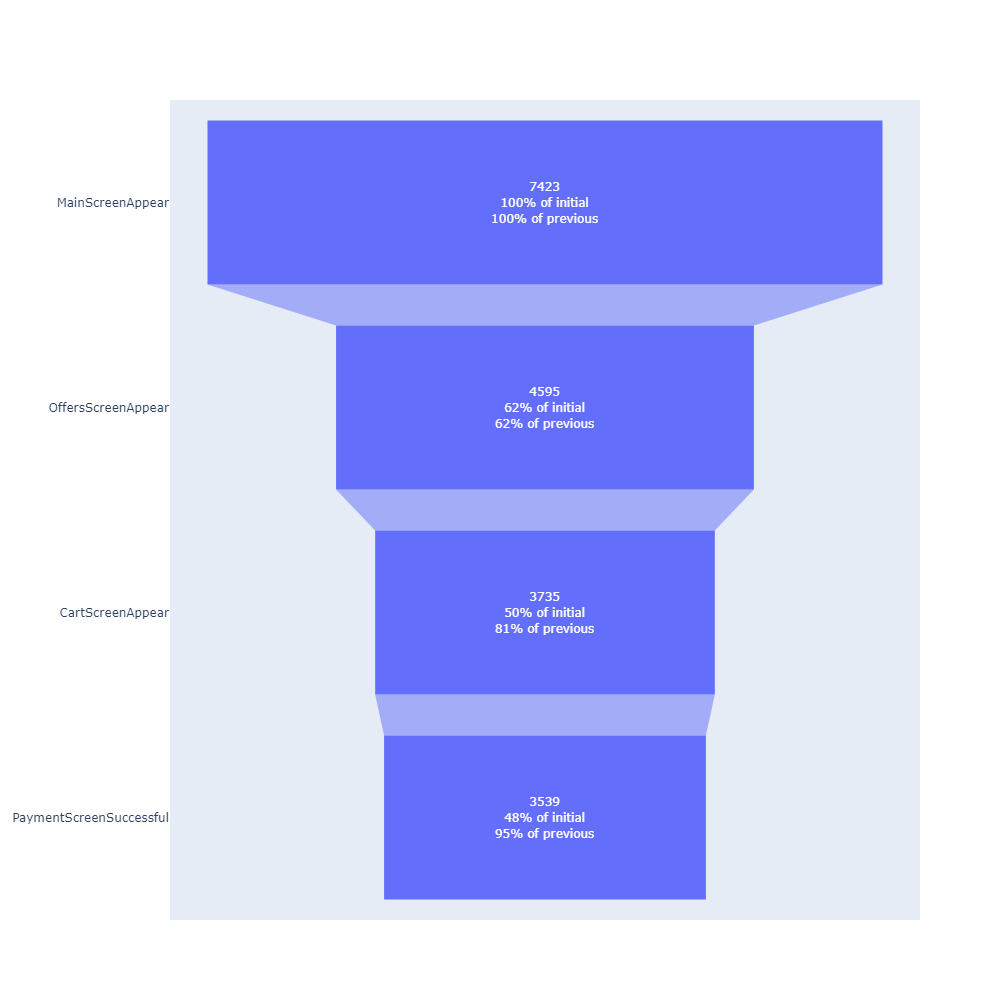

In [33]:
event_users = data.query('event != "Tutorial"').groupby('event', as_index=False).user.nunique().sort_values('user', ascending=False)

print('Общая воронка событий')
fig = go.Figure(go.Funnel(x = event_users['user'], y = event_users['event'], textinfo = "value+percent initial+percent previous"))
fig.show();

Рассмотрим воронки по группам

In [34]:
# for gr in ['a1', 'a2', 'b']:
#     df_ = data.query('group == @gr & event != "Tutorial"').groupby('event', as_index=False).user.count().sort_values('user', ascending=False)
#     print(f'Группа', gr)
#     display(df_)
#     fig = go.Figure(go.Funnel(x = df_['user'], y = df_['event'], textinfo = "value+percent initial+percent previous"))
#     fig.show();

Группа a1


,event,user
1,MainScreenAppear,2450
2,OffersScreenAppear,1542
0,CartScreenAppear,1266
3,PaymentScreenSuccessful,1200


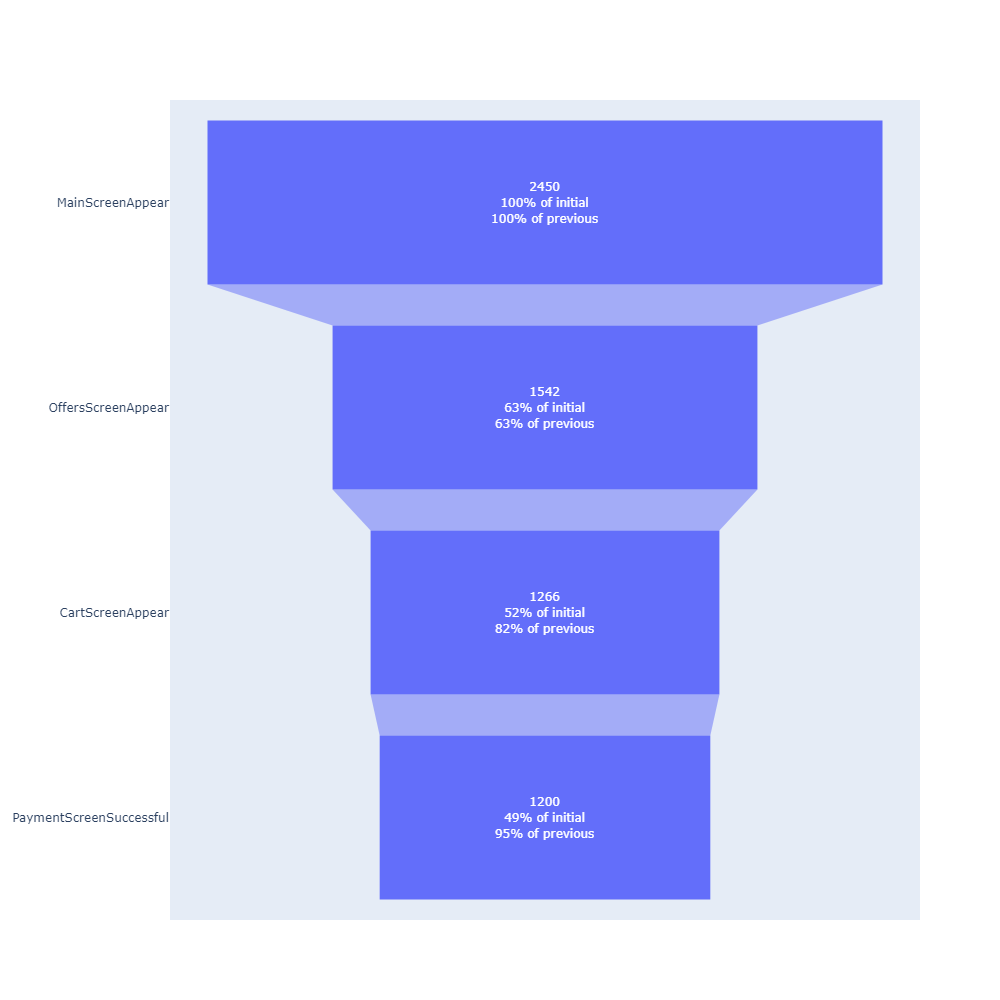

Группа a2


,event,user
1,MainScreenAppear,2479
2,OffersScreenAppear,1522
0,CartScreenAppear,1239
3,PaymentScreenSuccessful,1158


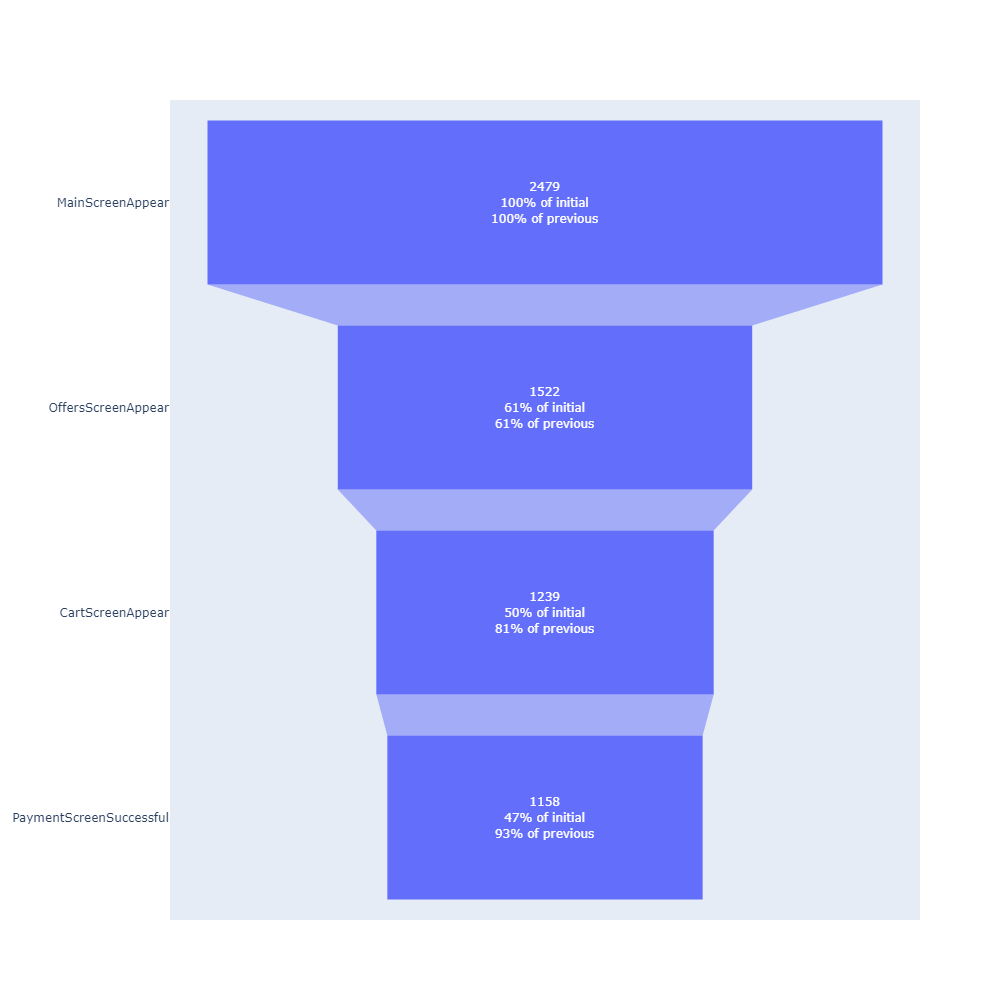

Группа b


,event,user
1,MainScreenAppear,2494
2,OffersScreenAppear,1531
0,CartScreenAppear,1230
3,PaymentScreenSuccessful,1181


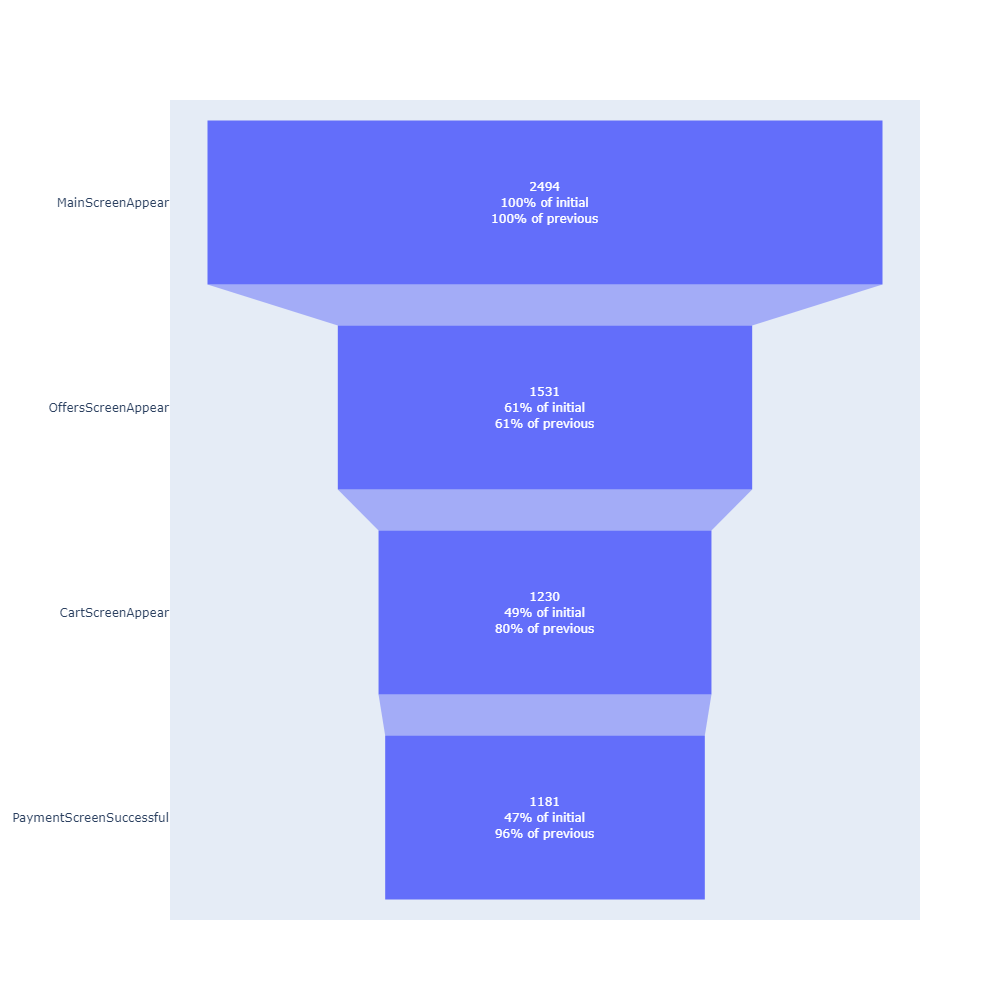

In [36]:
for gr in ['a1', 'a2', 'b']:
    df_ = data.query('group == @gr & event != "Tutorial"').groupby('event', as_index=False).user.nunique().sort_values('user', ascending=False)
    print(f'Группа', gr)
    display(df_)
    fig = go.Figure(go.Funnel(x = df_['user'], y = df_['event'], textinfo = "value+percent initial+percent previous"))
    fig.show();

Для наглядности расчитаем долю пользователей на каждом шаге относительно предыдущего шага и отобразим на графике

In [37]:
event_users = data.query('event != "Tutorial"').groupby('event').user.nunique().reset_index().sort_values('user', ascending=False)
event_users
event_users = event_users.reset_index(drop=True)
event_users

,event,user
0,MainScreenAppear,7423
1,OffersScreenAppear,4595
2,CartScreenAppear,3735
3,PaymentScreenSuccessful,3539


,event,user,to_prev,to_prev_%
0,MainScreenAppear,7423,1.00,100.00%
1,OffersScreenAppear,4595,0.62,62.00%
2,CartScreenAppear,3735,0.81,81.00%
3,PaymentScreenSuccessful,3539,0.95,95.00%


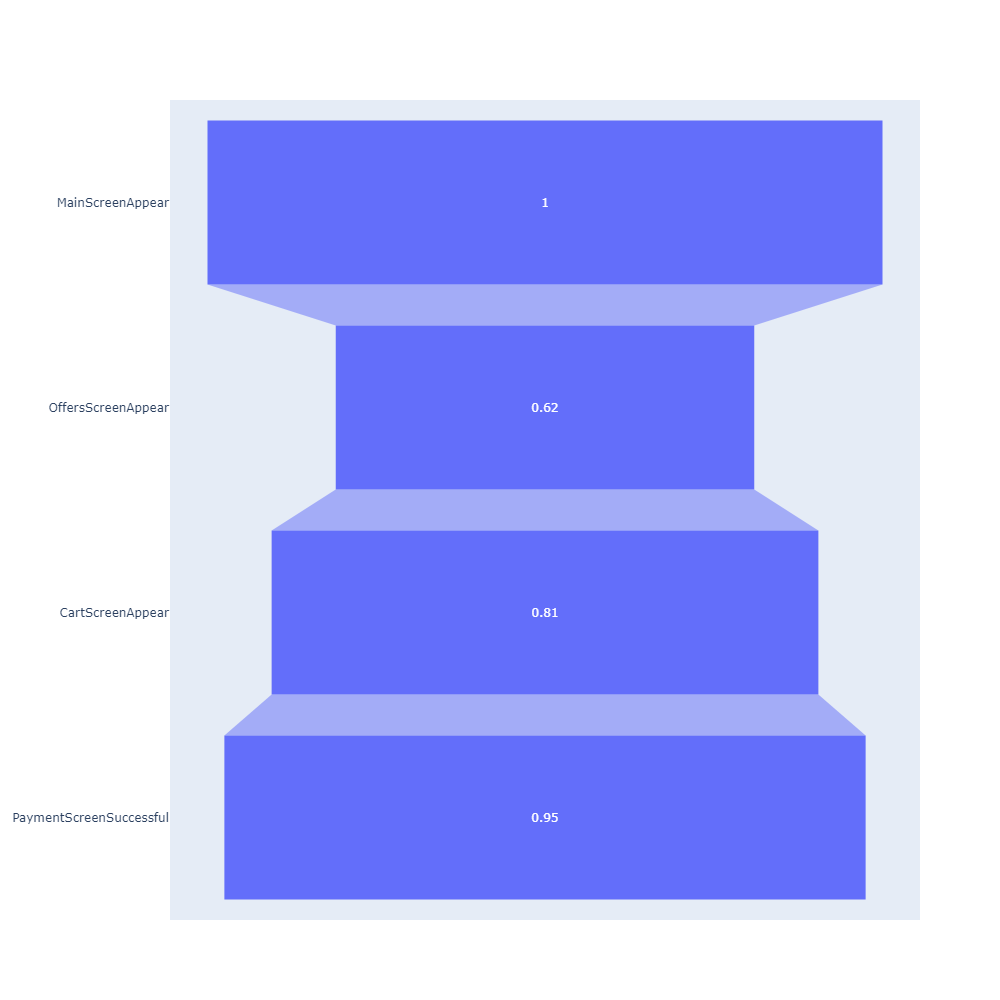

In [38]:
for i in event_users.index:
    if i == 0:
        event_users.loc[i, 'to_prev'] = 1
    else:
        event_users.loc[i, 'to_prev'] = (event_users.loc[i, 'user'] / event_users.loc[i-1, 'user']).round(2)
event_users['to_prev_%'] = event_users.to_prev.map(lambda x: '{:.2%}'.format(x))
display(event_users)
fig = go.Figure(go.Funnel(x = event_users.to_prev, y = event_users.event))
fig.show();

аналогично по группам

Группа a1


,event,user,to_prev,to_prev_%
0,MainScreenAppear,2450,1.00,100.00%
1,OffersScreenAppear,1542,0.63,63.00%
2,CartScreenAppear,1266,0.82,82.00%
3,PaymentScreenSuccessful,1200,0.95,95.00%


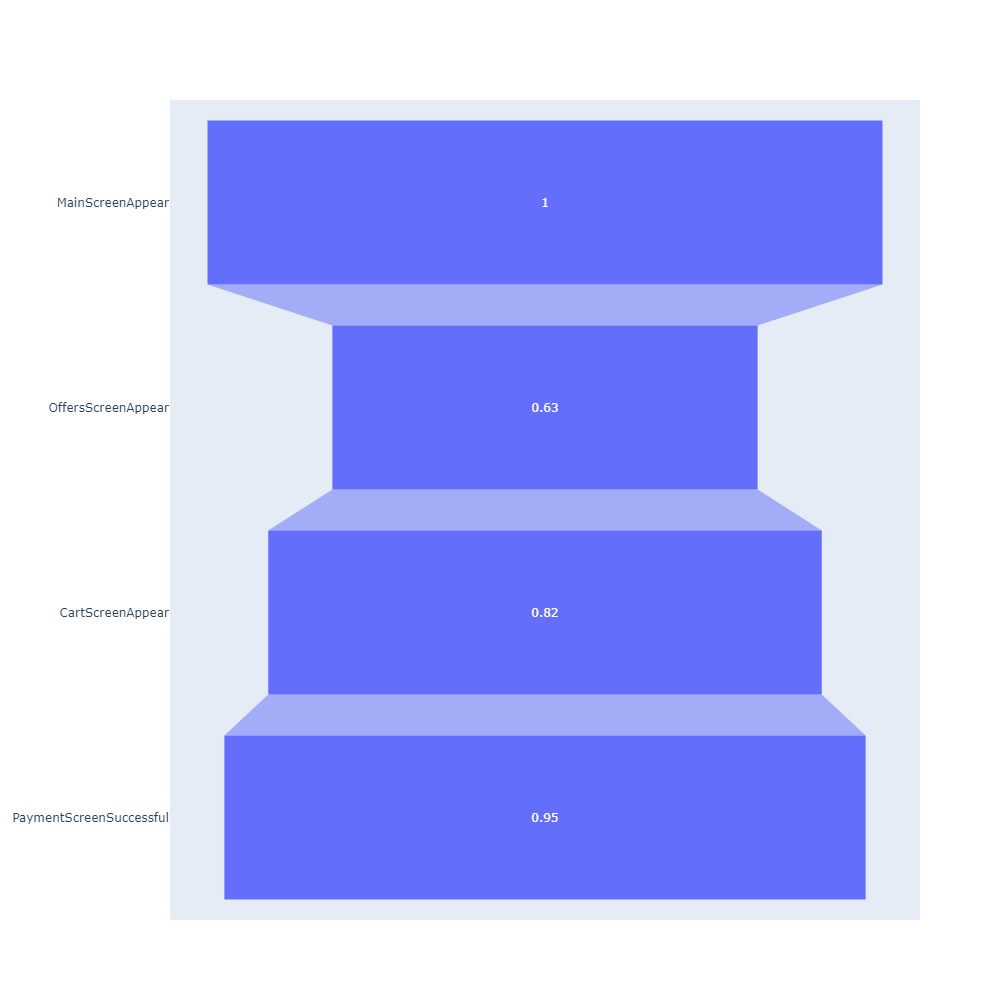

Группа a2


,event,user,to_prev,to_prev_%
0,MainScreenAppear,2479,1.00,100.00%
1,OffersScreenAppear,1522,0.61,61.00%
2,CartScreenAppear,1239,0.81,81.00%
3,PaymentScreenSuccessful,1158,0.93,93.00%


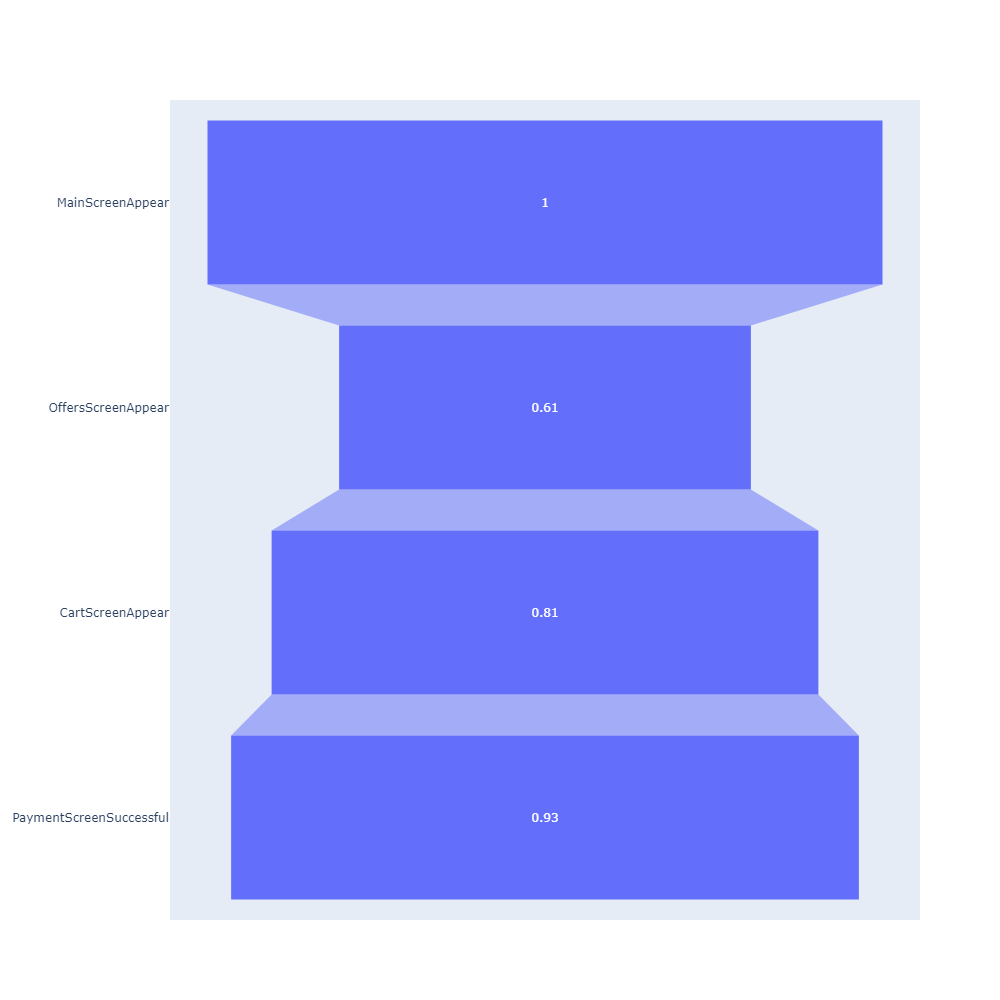

Группа b


,event,user,to_prev,to_prev_%
0,MainScreenAppear,2494,1.00,100.00%
1,OffersScreenAppear,1531,0.61,61.00%
2,CartScreenAppear,1230,0.80,80.00%
3,PaymentScreenSuccessful,1181,0.96,96.00%


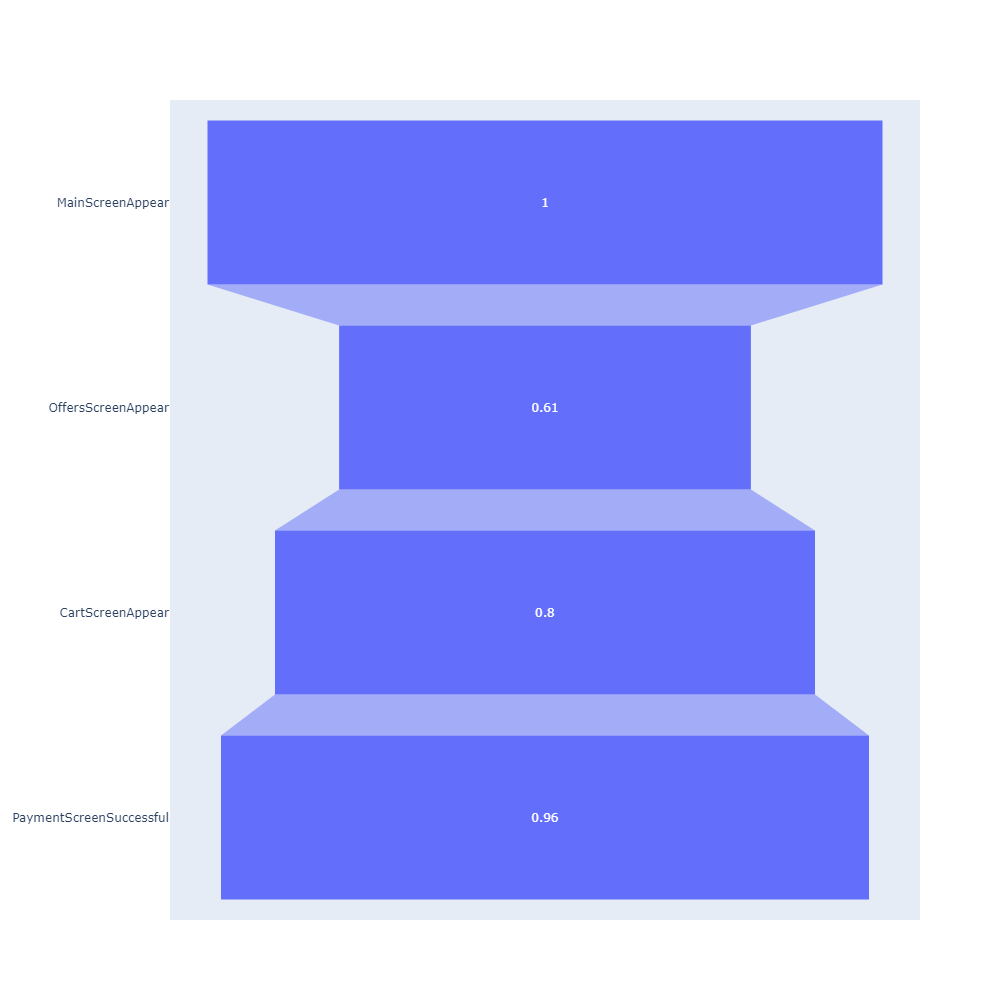

In [40]:
for gr in ['a1', 'a2', 'b']:
    df_ = data.query('group == @gr & event != "Tutorial"').groupby('event',as_index=False).user.nunique().sort_values('user', ascending=False).reset_index(drop=True)
    for i in df_.index:
        if i == 0:
            df_.loc[i, 'to_prev'] = 1
        else:
            df_.loc[i, 'to_prev'] = (df_.loc[i, 'user'] / df_.loc[i-1, 'user']).round(2)
    df_['to_prev_%'] = df_.to_prev.map(lambda x: '{:.2%}'.format(x))
    print('Группа', gr)
    display(df_)
    fig = go.Figure(go.Funnel(x = df_.to_prev, y = df_.event))
    fig.show();

Тем не менее имеется особенность: данные на текущий момент представлены в едином наборе и не отображают непрерывное поведение пользователя от начала до конца воронки, то есть отсутствует информация о том, сколько пользователей прошли весь путь.

In [41]:
cont_funnel = data.query('event != "Tutorial"').pivot_table(
        index=['user', 'group'], 
        columns='event', 
        values='datetime',
        aggfunc='min').reset_index()
cont_funnel.head()   # contiguous funnel

event,user,group,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful
0,6888746892508752,a1,NaT,2019-08-06 14:06:34,NaT,NaT
1,6909561520679493,a2,2019-08-06 18:52:58,2019-08-06 18:52:54,2019-08-06 18:53:04,2019-08-06 18:52:58
2,6922444491712477,a1,2019-08-04 14:19:40,2019-08-04 14:19:33,2019-08-04 14:19:46,2019-08-04 14:19:40
3,7435777799948366,b,NaT,2019-08-05 08:06:34,NaT,NaT
4,7702139951469979,a2,2019-08-02 14:28:45,2019-08-01 04:29:54,2019-08-01 04:29:56,2019-08-02 14:28:45


Имеются пропуски. Это означает, что не все пользователи прошли весь путь непрерывно от начала до конца. Составим последовательные условия, которые смогут показать кончное число пользователей, прошедших весь путь воронки польностью

In [42]:
mask_1 = cont_funnel.MainScreenAppear.notna()
mask_2 = mask_1 & (cont_funnel.OffersScreenAppear > cont_funnel.MainScreenAppear)
mask_3 = mask_2 & (cont_funnel.CartScreenAppear > cont_funnel.OffersScreenAppear)
mask_4 = mask_3 & (cont_funnel.PaymentScreenSuccessful > cont_funnel.CartScreenAppear)
n_MainScreenAppear = len(cont_funnel[mask_1])
n_OffersScreenAppear = len(cont_funnel[mask_2])
n_CartScreenAppear = len(cont_funnel[mask_3])
n_PaymentScreenSuccessful = len(cont_funnel[mask_4])

contiguous = pd.DataFrame( columns = ['event', 'users'], data = [
    ['MainScreenAppear',n_MainScreenAppear],
    ['OffersScreenAppear',n_OffersScreenAppear],
    ['CartScreenAppear',n_CartScreenAppear],
    ['PaymentScreenSuccessful',n_PaymentScreenSuccessful]
])

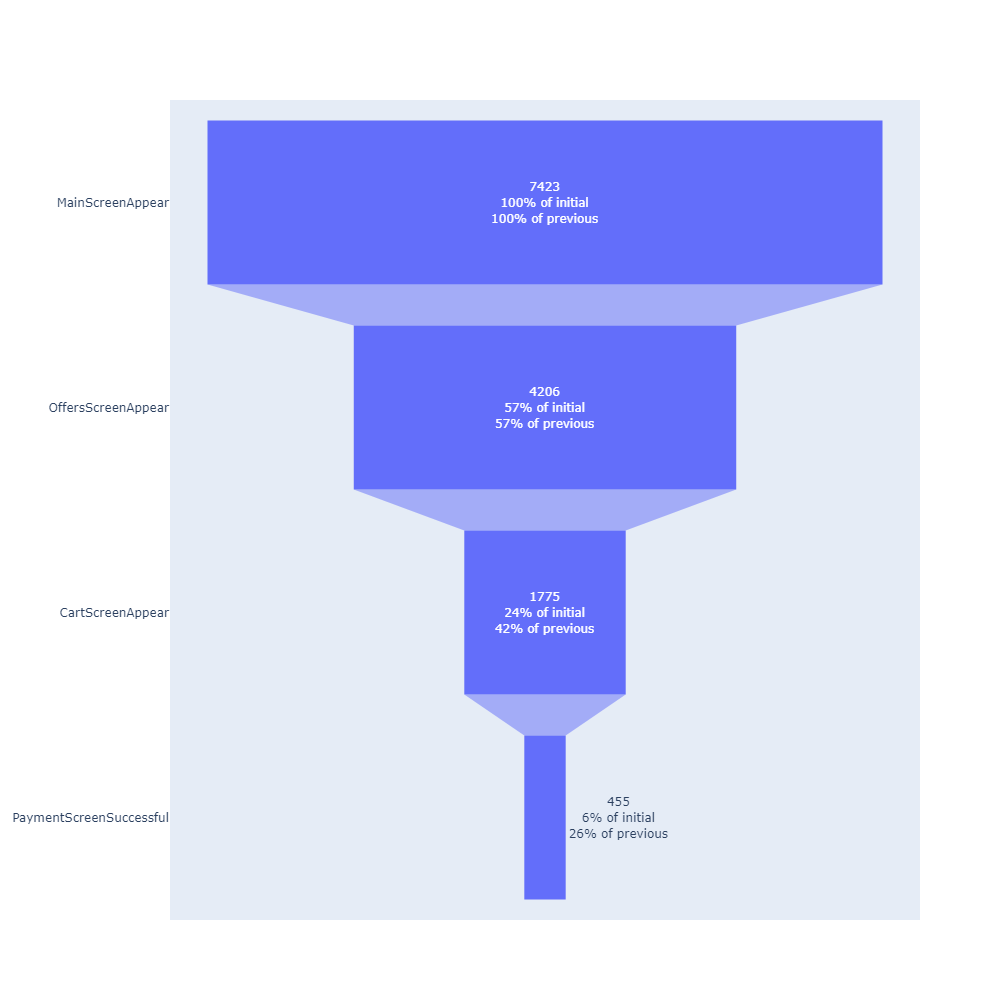

In [43]:
fig = go.Figure(go.Funnel(y = contiguous.event, x = contiguous.users, textinfo = "value+percent initial+percent previous"))
fig.show();

In [44]:
contiguous

,event,users
0,MainScreenAppear,7423
1,OffersScreenAppear,4206
2,CartScreenAppear,1775
3,PaymentScreenSuccessful,455


In [45]:
gr = ['a1', 'a2', 'b']
contiguous_group = {}
for group in gr:
    contiguous_group[group] =[]
    mask_1 = (cont_funnel.group ==group) & (cont_funnel.MainScreenAppear.notna())
    mask_2 =  mask_1 & (cont_funnel.OffersScreenAppear > cont_funnel.MainScreenAppear)
    mask_3 =  mask_2 & (cont_funnel.CartScreenAppear > cont_funnel.OffersScreenAppear)
    mask_4 =  mask_3 & (cont_funnel.PaymentScreenSuccessful > cont_funnel.CartScreenAppear)
    contiguous_group[group].append(len(cont_funnel[mask_1]))
    contiguous_group[group].append(len(cont_funnel[mask_2]))
    contiguous_group[group].append(len(cont_funnel[mask_3]))
    contiguous_group[group].append(len(cont_funnel[mask_4]))
    
contiguous_group

{'a1': [2450, 1413, 589, 145],
 'a2': [2479, 1380, 602, 145],
 'b': [2494, 1413, 584, 165]}

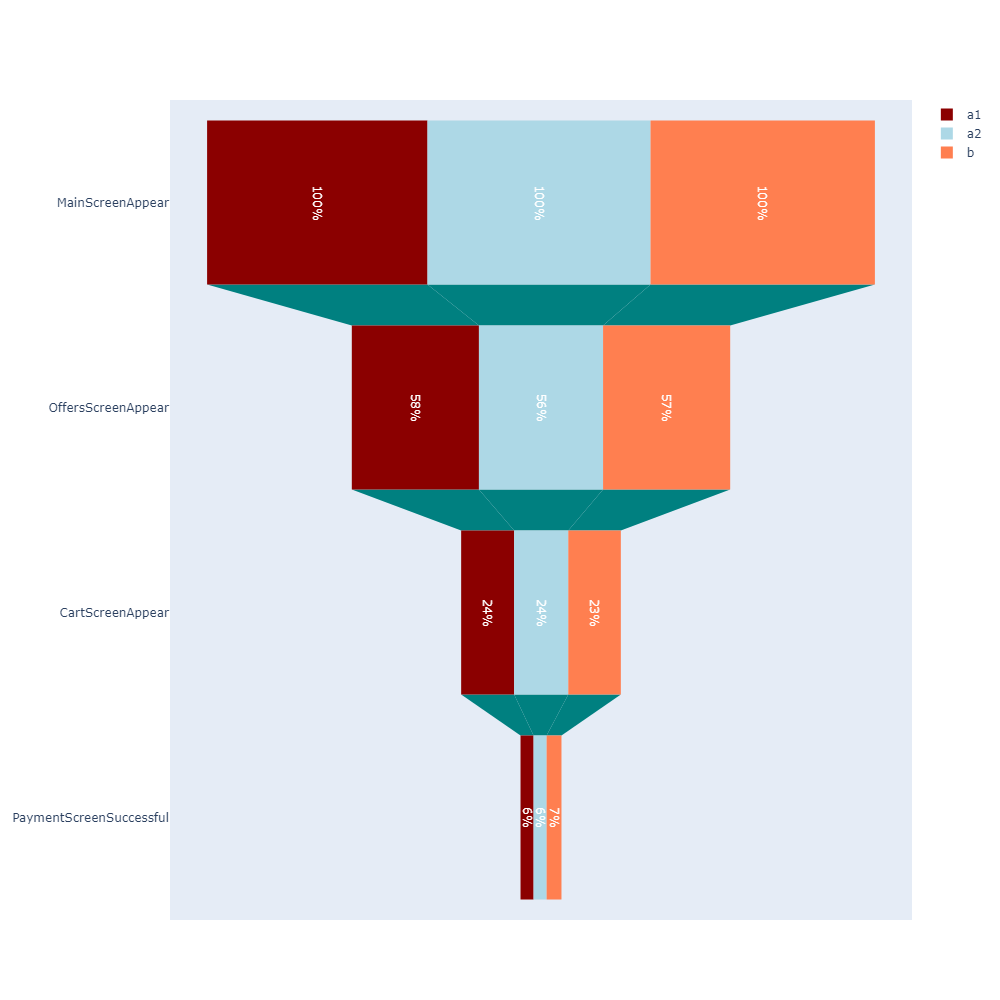

In [46]:
color = ['DarkRed','lightblue','coral']
fig = go.Figure()
for i in [0,1,2]:
    fig.add_trace(go.Funnel(
        name = gr[i],
        y = contiguous['event'],
        x = contiguous_group[gr[i]],
        textposition = "inside",
        textinfo = "percent initial",
#         textinfo = "value+percent initial+percent previous",
        constraintext='outside',
        textangle = 90,
        marker = {"color": color[i]},
        connector = {"fillcolor": 'teal'},
        insidetextfont = {'color': 'white'}))

fig.show()

### **Вывод**
* в общих данных имеются следующие виды событий:
    - MainScreenAppear, 117617, 48.74%;
    - OffersScreenAppear, 46420, 19.24%;
    - CartScreenAppear, 42322, 17.54%;
    - PaymentScreenSuccessful, 33935, 14.06%
    - Tutorial, 1006, 0.42%


* для воронки событий являются актуальными следующие:
    - MainScreenAppear, 117617, 48.74%;
    - OffersScreenAppear, 46420, 19.24%;
    - CartScreenAppear, 42322, 17.54%;
    - PaymentScreenSuccessful, 33935, 14.06%


* для неочищенных данных по пользователям воронка событий выглядит следующим образом:
    - MainScreenAppear: 7423: 98.47%
    - OffersScreenAppear: 4595: 60.96%
    - CartScreenAppear: 3735:	49.55%
    - PaymentScreenSuccessful: 3539: 46.95%


* для неочищенных данных по пользователям худшая конверсия происходит на шаге MainScreenAppear - OffersScreenAppear (39%)
* в группах А1 и А2 положение аналогично
* для группы В конверсия на шаге MainScreenAppear - OffersScreenAppear составляет 40%


* для очищенных данных конечная конверсия составляет 6%;
* наибольшее падение от предыдущего шага находится на шаге оплаты (конверсия 26%)
* групповое распределение воронки приблизительно одинаковое для всех трех групп и находится в следующих пределах:
    - MainScreenAppear 100% (А1 / А2 / В)
    - OffersScreenAppear 58%  _/_  56%  _/_  57%
    - CartScreenAppear 24%  _/_  24%  _/_  23%
    - PaymentScreenSuccessful 6%      _/_  6%  _/_  7% 


## **Шаг 5**: Изучение результатов эксперимента

In [47]:
user_groups = data.groupby('group').user.nunique()     #кол-во пользователей в группах
user_groups['a1+a2'] = user_groups.a1 + user_groups.a2
user_groups

group
a1       2484
a2       2517
b        2537
a1+a2    5001
Name: user, dtype: int64

Группы отличаются друг от друга незначительно

In [48]:
# выбор самого популярного события
event_groups = data.query('event!="Tutorial"').pivot_table(
    index='event', 
    columns='group', 
    values='user',
    aggfunc='nunique').sort_values(by='a1', ascending=False).reset_index()

event_groups['a1+a2'] = event_groups.a1 + event_groups.a2
event_groups

group,event,a1,a2,b,a1+a2
0,MainScreenAppear,2450,2479,2494,4929
1,OffersScreenAppear,1542,1522,1531,3064
2,CartScreenAppear,1266,1239,1230,2505
3,PaymentScreenSuccessful,1200,1158,1181,2358


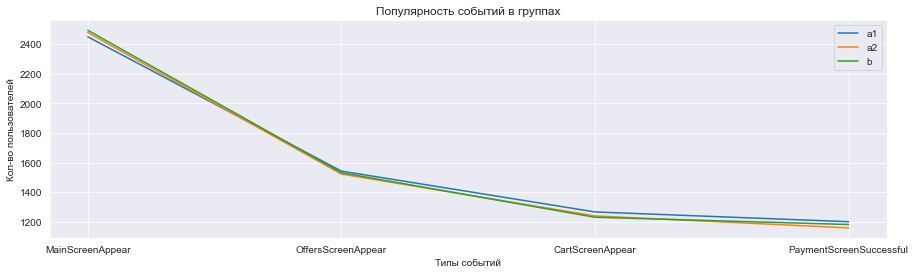

In [49]:
plt.rcParams["figure.figsize"] = (15, 4)
plt.plot(event_groups.event, event_groups.a1, label='a1')
plt.plot(event_groups.event, event_groups.a2, label='a2')
plt.plot(event_groups.event, event_groups.b, label='b')
plt.legend()
plt.title('Популярность событий в группах')
plt.xlabel('Типы событий')
plt.ylabel('Кол-во пользователей')
plt.grid(True)
plt.show()

Порядок популярности событий постоянен во всех группах

In [50]:
# ф-ция группового тестирования отличия параметра в паре групп group1 и group2
# с определенным уровнем значимости alpha

def z_test(group1, group2, alpha):
    for i in event_groups.index:
        p1 = event_groups[group1][i] / user_groups[group1] # пропорция успеха в 1-й группе
        p2 = event_groups[group2][i] / user_groups[group2] # пропорция успеха во 2-й группе
        # пропорция успехов в комбинированном датасете:
        p_combined = ((event_groups[group1][i] + event_groups[group2][i]) / 
                      (user_groups[group1] + user_groups[group2]))
        # разница пропорций в датасетах
        difference = p1 - p2
        # статистика в ст.отклонениях нормального распределения
        z_value = difference / math.sqrt(p_combined * (1 - p_combined) * 
                                        (1/user_groups[group1] + 1/user_groups[group2]))
        # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
        distr = st.norm(0, 1) 
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        print(f'Для {event_groups["event"][i]}\np-value = : {p_value}')
        if (p_value < alpha):
            print("Отвергаем нулевую гипотезу: между пропорциями имеется статистически значимая разница")
            
        else:
            print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы (доли) разными")
        print('-'*80)

* В качестве нулевой гипотезы $Н_{0}$ примем, что статистически значимого различия между долями (пропорциями) нет; ;
* Гипотеза $Н_{1}$ будет говорить о противоположном: имеется статистически значимое различие между пропорциями

Групповое тестирование в соответствии с заданной выше ф-цией будет проводиться поочередно для каждого из параметров попарно для выбранных групп

In [51]:
print('\033[1m'+'Тестирование а1 и а2 групп'+'\033[0m', end='\n\n')
z_test("a1", "a2", 0.01)  #для теста групп без внесенных в процесс изменений уровень значимости строже (ниже 0,05, стандарт - 0,01)

Тестирование а1 и а2 групп

Для MainScreenAppear
p-value = : 0.6756217702005545
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы (доли) разными
--------------------------------------------------------------------------------
Для OffersScreenAppear
p-value = : 0.24301271796804658
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы (доли) разными
--------------------------------------------------------------------------------
Для CartScreenAppear
p-value = : 0.2182812140633792
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы (доли) разными
--------------------------------------------------------------------------------
Для PaymentScreenSuccessful
p-value = : 0.10298394982948822
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы (доли) разными
--------------------------------------------------------------------------------


Различий между группами а1 и а2 не выявлено, их можно считать контрольными

In [52]:
print('\033[1m'+f'Тестирование а1 и b групп'+'\033[0m', end='\n\n')
z_test("a1", "b", 0.05) # для сравнения отличающихся групп уровень значимости стандартный (0,05)

Тестирование а1 и b групп

Для MainScreenAppear
p-value = : 0.34705881021236484
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы (доли) разными
--------------------------------------------------------------------------------
Для OffersScreenAppear
p-value = : 0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы (доли) разными
--------------------------------------------------------------------------------
Для CartScreenAppear
p-value = : 0.07842923237520116
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы (доли) разными
--------------------------------------------------------------------------------
Для PaymentScreenSuccessful
p-value = : 0.2122553275697796
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы (доли) разными
--------------------------------------------------------------------------------


In [53]:
print('\033[1m'+f'Тестирование а2 и b групп'+'\033[0m', end='\n\n')
z_test("a2", "b", 0.05)

Тестирование а2 и b групп

Для MainScreenAppear
p-value = : 0.6001661582453706
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы (доли) разными
--------------------------------------------------------------------------------
Для OffersScreenAppear
p-value = : 0.9293730042460788
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы (доли) разными
--------------------------------------------------------------------------------
Для CartScreenAppear
p-value = : 0.5973544899382834
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы (доли) разными
--------------------------------------------------------------------------------
Для PaymentScreenSuccessful
p-value = : 0.6982134522789267
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы (доли) разными
--------------------------------------------------------------------------------


In [54]:
print('\033[1m'+f'Тестирование а1+а2 и b групп'+'\033[0m', end='\n\n')
z_test("a1+a2", "b", 0.05)

Тестирование а1+а2 и b групп

Для MainScreenAppear
p-value = : 0.39298914928006035
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы (доли) разными
--------------------------------------------------------------------------------
Для OffersScreenAppear
p-value = : 0.4386768167991866
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы (доли) разными
--------------------------------------------------------------------------------
Для CartScreenAppear
p-value = : 0.18714829717090664
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы (доли) разными
--------------------------------------------------------------------------------
Для PaymentScreenSuccessful
p-value = : 0.6221237660987535
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы (доли) разными
--------------------------------------------------------------------------------


### **Вывод**
В ходе эксперимента проведены 4 группы тестов по 4-м параметрам воронки в общем количестве 16 пар:
* A1/B сравнение с уровнем значимости в 5%
* A2/B сравнение с уровнем значимости в 5%
* A1+A2/B сравнение с уровнем значимости в 5%
* A1/A2 сравнение с уровнем значимости в 1%
* стадии для сравнения:
  1. MainScreenAppear
  2. OffersScreenAppear
  3. CartScreenAppear
  4. PaymentScreenSuccessful


* Различий между группами A1 и A2 не выявлено, их можно считать контрольными
* Минимальный уровень значения p-value имеет шаг воронки CartScreenAppear в тесте групп A1/B и составляет 7,8%, что, тем не менее, больше порогового стандартного уровна 5%. Если задать уровень значимости как 10%, то вероятность получить ошибку возрастает до 1/10, поэтому было принято решение отказаться от данного шага изначально и применить стандартные уровни в 5% для сравненния групп с изменением процесса и без него, и строгий порог в 1% для групп без внесенных изменений
* Остальные значения p-value составляют десятки процентов во всех тестах, что значительно. Это позволяет сделать вывод об отсутствии различий между группами

## **Общий вывод**

**Шаг 1, 2: Анализ и предобработка данных**

* Данные представлены в одном файле
* Пропуски отсуствуют
* Дубликаты удалены в кол-ве 413
* Названия колонок заменены на более простые и в соответствии с требованиями ***snake_style***
* Данные о событии преставлены строковым типом, данные об id пользователя, дата и время, группа представлены целочисленным типом


**Шаг 3: Изучение и проверка данных**
* Кол-во событий в логе - 243713
* Кол-во пользователей в логе - 7551
* Среднее кол-во событий на пользователя - 32,28, медиана - 20

* Временной отрезок с полными данными: 2019/07/31 21:00 - 2019-08-07 21:15:17


* Кол-во отфильтрованных записей событий: 2413
* Доля отфильтрованных записей событий: 0.99 %
* Кол-во отфильтрованных пользователей: 13
* Доля отфильтрованных пользователей: 0.17 %


* Кол-во пользователей в группе № 246 составляет  2484
* Кол-во пользователей в группе № 247 составляет  2517
* Кол-во пользователей в группе № 248 составляет  2537
* Группы пользователей не пересекаются

**Шаг 4: Воронка событий**


* в общих данных имеются следующие виды событий:
    - MainScreenAppear, 117617, 48.74%;
    - OffersScreenAppear, 46420, 19.24%;
    - CartScreenAppear, 42322, 17.54%;
    - PaymentScreenSuccessful, 33935, 14.06%
    - Tutorial, 1006, 0.42%


* для воронки событий являются актуальными следующие:
    - MainScreenAppear, 117617, 48.74%;
    - OffersScreenAppear, 46420, 19.24%;
    - CartScreenAppear, 42322, 17.54%;
    - PaymentScreenSuccessful, 33935, 14.06%


* для неочищенных данных по пользователям воронка событий выглядит следующим образом:
    - MainScreenAppear: 7423: 98.47%
    - OffersScreenAppear: 4595: 60.96%
    - CartScreenAppear: 3735:	49.55%
    - PaymentScreenSuccessful: 3539: 46.95%


* для неочищенных данных по пользователям худшая конверсия происходит на шаге MainScreenAppear - OffersScreenAppear (39%)
* в группах А1 и А2 положение аналогично
* для группы В конверсия на шаге MainScreenAppear - OffersScreenAppear составляет 40%


* для очищенных данных конечная конверсия составляет 6%;
* наибольшее падение от предыдущего шага находится на шаге оплаты (конверсия 26%)
* групповое распределение воронки приблизительно одинаковое для всех трех групп и находится в следующих пределах:
    - MainScreenAppear 100% (А1 / А2 / В)
    - OffersScreenAppear 58%  _/_  56%  _/_  57%
    - CartScreenAppear 24%  _/_  24%  _/_  23%
    - PaymentScreenSuccessful 6%      _/_  6%  _/_  7% 

**Шаг 5: Изучение результатов эксперимента**
В ходе эксперимента проведены 4 группы тестов по 4-м параметрам воронки в общем количестве 16 пар:
* а1/b сравнение с уровнем значимости в 5%
* а2/b сравнение с уровнем значимости в 5%
* а1+а2/b сравнение с уровнем значимости в 5%
* а1/а2 сравнение с уровнем значимости в 1%
* стадии для сравнения:
  1. MainScreenAppear
  2. OffersScreenAppear
  3. CartScreenAppear
  4. PaymentScreenSuccessful


* Различий между группами A1 и A2 не выявлено, их можно считать контрольными
* Минимальный уровень значения p-value имеет шаг воронки CartScreenAppear в тесте групп A1/B и составляет 7,8%, что, тем не менее, больше порогового стандартного уровна 5%. Если задать уровень значимости как 10%, то вероятность получить ошибку возрастает до 1/10, поэтому было принято решение отказаться от данного шага изначально и применить стандартные уровни в 5% для сравненния групп с изменением процесса и без него, и строгий порог в 1% для групп без внесенных изменений
* Остальные значения p-value составляют десятки процентов во всех тестах, что значительно. Это позволяет сделать вывод об отсутствии различий между группами

**Итог**: при проведении A/A/B теста различий между группами не выявлено
